<a href="https://colab.research.google.com/github/Ultan-Kearns/ZTM-Tensorflow-Developer-Certificate/blob/master/02_Neural_Network_Classification_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Network Classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification problem is where you try to classify a particular object

A few types of classification problems

* Binary classification
* Multiclass classification
* Multilabel classificaiton

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# make 1000 examples
n_samples = 1000
# Create circles
X,y = make_circles(n_samples,noise=0.03,random_state=42)

In [2]:
 # Check features
 X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now let's visualize it

In [4]:
import pandas as pd

circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [5]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

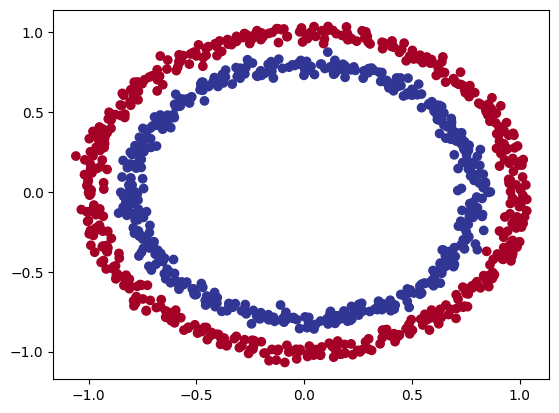

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

**Exercise**: Before pushing forward spend 10 mins playing around with TF playground building and running different neural networks.  See what happens when you change different hyper parameters

## Input and output shapes

In [7]:
# Check the shapes of our features and labels

X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [9]:
# View the first examples of features and labels
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

## My model

In [10]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["accuracy"])
model.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 3s 4ms/step - loss: 0.6914 - accuracy: 0.5230
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6878 - accuracy: 0.5140
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6833 - accuracy: 0.5530
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6767 - accuracy: 0.5810
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6695 - accuracy: 0.5580
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6509 - accuracy: 0.5940
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6416 - accuracy: 0.6320
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6282 - accuracy: 0.6370
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6148 - accuracy: 0.6430
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6108 - accuracy: 0.6390
Epoch 11/

## Steps in modelling

The steps in modelling with Tensorflow are typically:

1. Create the model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [11]:
## Set the random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

# fit the model
model_1.fit(X,y,epochs=200)

Epoch 1/200
32/32 [==============================] - 3s 3ms/step - loss: 4.9336 - accuracy: 0.4810
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 4.9132 - accuracy: 0.4810
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 4.8943 - accuracy: 0.4810
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 4.8875 - accuracy: 0.4800
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 4.8846 - accuracy: 0.4790
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 4.8665 - accuracy: 0.4790
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 4.8267 - accuracy: 0.4790
Epoch 8/200
32/32 [==============================] - 0s 3ms/step - loss: 4.7887 - accuracy: 0.4780
Epoch 9/200
32/32 [==============================] - 0s 3ms/step - loss: 4.7819 - accuracy: 0.4770
Epoch 10/200
32/32 [==============================] - 0s 3ms/step - loss: 4.7785 - accuracy: 0.4770
Epoch 11/

Since we're working on a binary classification problem the model has an accuracy of around 50% which makes it seem like the model is guessing....

In [12]:
tf.random.set_seed(42)

# Create a model with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model

model_2.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.SGD(),metrics=["accuracy"])

# fit the model

model_2.fit(X,y,epochs=100,verbose=0)

In [13]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932345032691956, 0.5]

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might want to add more layers, or increase the number of hidden units within a layer
2. Compiling a model - here we might want to choose a different optimization function such as Adam instead of SGD
3. Fitting a model - Perhaps we might fit our model for more epochs(longer training)

In [14]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (This time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

# finally fit the model
model_3.fit(X,y,epochs=100,verbose=0)

In [15]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6960 - accuracy: 0.5100


[0.6959541440010071, 0.5099999904632568]

To visualize our model's predictions, let's create a function `plot_decision_boundary`, this function will:

* Take in trained model, features(X) and labels(Y)
* Create a mesh grid of different X values
* Make predicitions across the meshgrid
* Plot the predictions as well as a line between zones(where each unique class falls)


In [16]:

import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


In [17]:
  x_min,x_max = X[:,0].min()-0.1, X[:,0] + 0.1
  y_min,y_max = X[:,1].min()-0.1, X[:,1] + 0.1
  x_min,x_max,y_min,y_max

(-1.1595024599098636,
 array([ 8.54246251e-01, -6.56158882e-01, -7.15391934e-01, -2.93730729e-01,
         5.42207645e-01, -3.79646368e-01,  8.63516405e-02,  8.71513274e-01,
        -6.93223397e-02, -2.14857961e-02, -5.42490416e-01,  6.69466604e-01,
        -1.77359106e-02,  8.34100038e-01,  7.00776333e-01,  2.90225707e-01,
        -8.36951846e-01,  2.07061696e-01, -7.18913619e-01, -5.42100130e-01,
         7.26827199e-01, -4.62291360e-01,  7.87333421e-02,  8.39770578e-01,
        -8.09048393e-01, -8.36994111e-01,  3.86615780e-01,  9.26260717e-01,
         3.53433397e-01,  7.57946255e-01, -2.14834779e-01, -1.23989601e-01,
         1.08443892e-01,  1.10503887e+00,  1.04841802e-02, -6.88574473e-01,
        -4.68205362e-01,  5.47646782e-01,  3.63260719e-01,  8.45020435e-01,
        -4.97118971e-01,  4.61928379e-01, -6.14242507e-01,  9.33839377e-01,
        -7.33981856e-01, -8.10860642e-01,  5.87625557e-01,  3.30736878e-01,
         8.58412791e-01, -3.12746839e-01,  5.76176622e-01,  1.3999

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


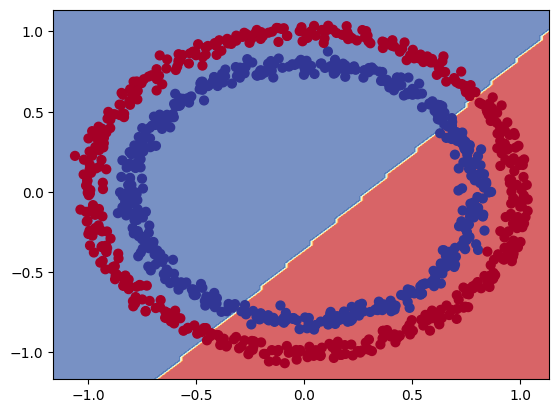

In [18]:
# Check out the predictions our model is making

plot_decision_boundary(model=model_3,X=X,y=y)

313/313 [==============================] - 2s 4ms/step
doing binary classifcation...


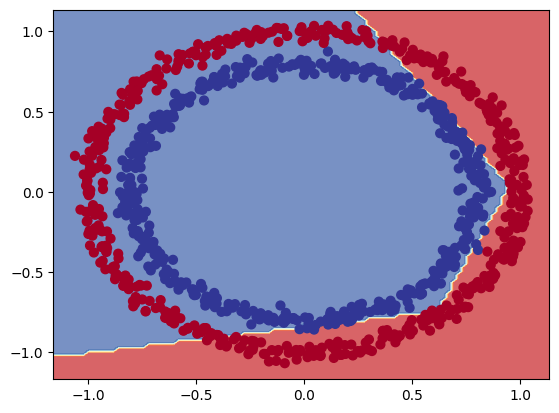

In [19]:
# Mapping my model

plot_decision_boundary(model=model,X=X,y=y)